In [71]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


online=pd.read_csv('online.csv')
print(online.head())
print(online.describe())
print(online.info())


   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2011-10-25 08:26:00       2.10       14286  United Kingdom  
1  2011-11-20 11:56:00       1.45       16360  United Kingdom  
2  2011-07-14 13:35:00       3.75       13933  United Kingdom  
3  2011-11-23 15:53:00       2.10       17290  United Kingdom  
4  2011-05-25 13:36:00       5.95       17663  United Kingdom  
          Unnamed: 0      InvoiceNo      Quantity     UnitPrice   CustomerID
count   70864.000000   70864.000000  70864.000000  7

In [72]:
#data cleanning
online['InvoiceDate']=pd.to_datetime(online['InvoiceDate'])

def get_month(x): return dt.datetime(x.year, x.month, 1) 

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month) 
grouping = online.groupby('CustomerID')['InvoiceMonth'] 
online['CohortMonth'] = grouping.transform(min)
print(online.head())

def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
online['CohortIndex'] = years_diff * 12 + months_diff  +  1
print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom   2011-10-01   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom   2011-11-01   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom   2011-07-01   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom   2011-11-01   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom   2011-05-01   

  CohortMonth  
0  2011-04-01  
1  2011-09-01  
2 

  CohortMonth  CohortIndex  CustomerID
0  2010-12-01            1         716
1  2010-12-01            2         246
2  2010-12-01            3         221
3  2010-12-01            4         251
4  2010-12-01            5         245


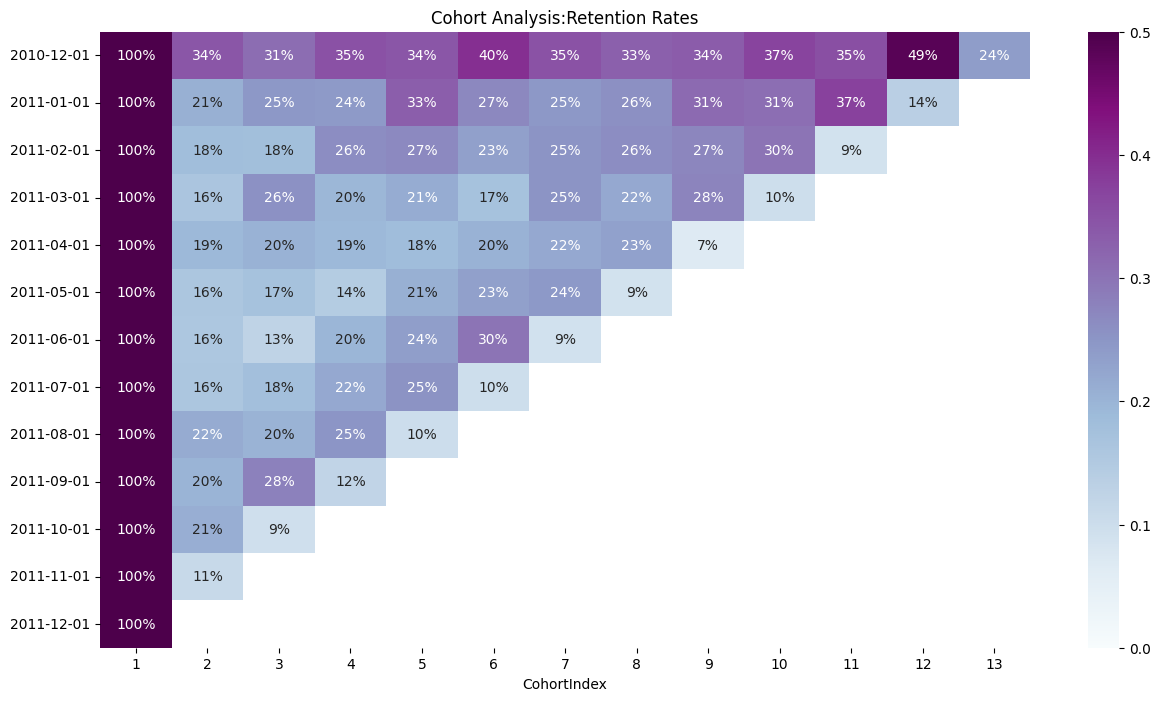

In [73]:
cohort_data=online.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
print(cohort_data.head())
cohort_counts =cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes,axis=0)
retention.round(3) * 100
retention.index = retention.index.date
retention.head()

plt.figure(figsize=(15,8))
plt.title("Cohort Analysis:Retention Rates")
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu")
plt.show()